## D19018

##  MANISH KUMAR

## Objective :-  time  and solutoin comarision of gradient descent alogritham  and close form solution 

In [213]:
import numpy as np
import os
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset")
cars=pd.read_csv('cars.csv')

In [215]:
import statsmodels.api as stm
import math

In [216]:
X = cars[['Weight', 'Horsepower', 'Displacement','Cylinders','Acceleration']]
X = stm.add_constant(X)
y = cars['MPG']

In [217]:
X.head()

,const,Weight,Horsepower,Displacement,Cylinders,Acceleration
0,1.0,3504,130,307.0,8,12.0
1,1.0,3693,165,350.0,8,11.5
2,1.0,3436,150,318.0,8,11.0
3,1.0,3433,150,304.0,8,12.0
4,1.0,3449,140,302.0,8,10.5


In [218]:
model = stm.OLS(y,X).fit()
model.params

const           44.121814
Weight          -0.005457
Horsepower      -0.035866
Displacement    -0.002630
Cylinders       -0.286299
Acceleration     0.063229
dtype: float64

# Closed form solution

In [222]:
cars1 = cars[['MPG','Weight', 'Horsepower', 'Displacement','Cylinders','Acceleration']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [223]:
cars1.head()

,MPG,Weight,Horsepower,Displacement,Cylinders,Acceleration
0,0.386266,0.536150,0.565217,0.617571,1.0,0.238095
1,0.321888,0.589736,0.717391,0.728682,1.0,0.208333
2,0.386266,0.516870,0.652174,0.645995,1.0,0.178571
3,0.343348,0.516019,0.652174,0.609819,1.0,0.238095
4,0.364807,0.520556,0.608696,0.604651,1.0,0.148810


In [224]:
cars_scaled2 = cars[['MPG','Weight','Horsepower','Displacement','Cylinders','Acceleration']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [225]:
#X and y
X = cars_scaled2[['Weight','Horsepower','Displacement','Cylinders','Acceleration']]
X = stm.add_constant(X)
y = cars_scaled2['MPG']

X = X.as_matrix()
y = y.as_matrix()
y=y.reshape(406,1)

In [226]:
cars1.mean()             ##mean of all variable 

MPG             0.494662
Weight          0.387415
Horsepower      0.450129
Displacement    0.327596
Cylinders       0.495074
Acceleration    0.447601
dtype: float64

In [227]:
cars1.std()            ## standar deviation of all variable

MPG             0.180296
Weight          0.240149
Horsepower      0.176177
Displacement    0.271117
Cylinders       0.342432
Acceleration    0.166867
dtype: float64

In [235]:
#X and y
start=time.time()
X = cars_scaled2[['Weight','Horsepower','Displacement','Cylinders','Acceleration']]
X = stm.add_constant(X)           #use of stasticsl model
y = cars_scaled2['MPG']

X = X.as_matrix()                 # matrix declaration
y = y.as_matrix()                 # matrix declaration         
y=y.reshape(406,1)
stop=time.time()
print(stop-start)     

0.04688620567321777


In [229]:
tX = np.transpose(X)

In [230]:
#Closed form solution for the coefficients
np.matmul(np.matmul(np.linalg.inv(np.matmul(tX,X)), tX),y)

array([[ 0.74651644],
       [-0.41302691],
       [-0.1770198 ],
       [-0.0218415 ],
       [-0.03071879],
       [ 0.02279491]])

In [231]:
# close form model value
model = stm.OLS(y,X).fit()
model.params

array([ 0.74651644, -0.41302691, -0.1770198 , -0.0218415 , -0.03071879,
        0.02279491])

## GRADIENT DESCENT FUNCTION WITH SCALED (STANDARDISED)

In [236]:
#X and y
X = cars_scaled2[['Weight','Horsepower','Displacement','Cylinders','Acceleration']]  ## variable name from cars.csv file
X = stm.add_constant(X)
y = cars_scaled2['MPG']                                ## predictor varaible name
start=time.time()
Weight0=[]
Weight1=[]
Weight2=[]
Weight3=[]
Weight4=[]
Weight5=[]
delta1=[]
X = X.as_matrix()                   
y = y.as_matrix()
y=y.reshape(406,1)
#Initialize the weight vector
Weight = np.array([[0],[0],[0],[0],[0],[0]])
# Horsepower=np.array([[0],[0]])
# Acceleratoin=np.array([[0],[0]])
#Fix a atep size
alpha = 0.0003
delta = 1
tolerance = 0.0001
count = 0

#Optimization
while np.sum(delta**2) > tolerance :
    delta = np.matmul(np.transpose(X), (y - np.matmul(X,Weight)))
#     delta = np.matmul(np.transpose(X), (y - np.matmul(X,Horsepower)))
    Weight = Weight - (-2)*alpha*delta
    count += 1
    Weight0.append(Weight[0])
    Weight1.append(Weight[1])
    Weight2.append(Weight[2])
    Weight3.append(Weight[3])
    Weight4.append(Weight[4])
    Weight5.append(Weight[5])
    delta1.append(np.sum(delta**2))
stop=time.time()

print(count)
print(Weight)
print(len(Weight0))
print(stop-start)

5077
[[ 0.74435867]
 [-0.41231484]
 [-0.17256688]
 [-0.02807095]
 [-0.02795456]
 [ 0.02400844]]
5077
0.3033485412597656


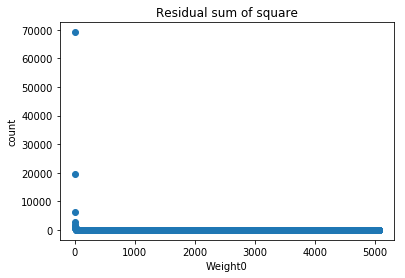

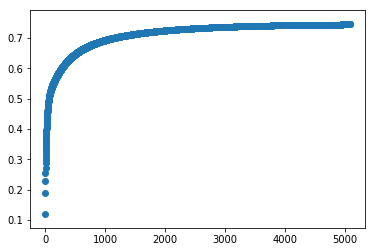

In [237]:
plt.scatter(np.arange(count),delta1)
plt.title('Residual sum of square')
plt.xlabel('Weight0')
plt.ylabel('count')
figsize=(8,10)
plt.show()
plt.scatter(np.arange(count),Weight0)
plt.show()

In [196]:
#changing the value of aloha and tolerence
X = cars_scaled2[['Weight','Horsepower','Displacement','Cylinders','Acceleration']]
X = stm.add_constant(X)
y = cars_scaled2['MPG']
Weight0=[]
Weight1=[]
Weight2=[]
Weight3=[]
Weight4=[]
Weight5=[]
delta1=[]
X = X.as_matrix()
y = y.as_matrix()
y=y.reshape(406,1)
#Initialize the weight vector
Weight = np.array([[0],[0],[0],[0],[0],[0]])
# Horsepower=np.array([[0],[0]])
# Acceleratoin=np.array([[0],[0]])
#Fix a atep size
alpha = 0.0001
delta = 1
tolerance = 0.0002
count = 0

#Optimization
while np.sum(delta**2) > tolerance :
    delta = np.matmul(np.transpose(X), (y - np.matmul(X,Weight)))
#     delta = np.matmul(np.transpose(X), (y - np.matmul(X,Horsepower)))
    Weight = Weight - (-2)*alpha*delta
    count += 1
    Weight0.append(Weight[0])
    Weight1.append(Weight[1])
    Weight2.append(Weight[2])
    Weight3.append(Weight[3])
    Weight4.append(Weight[4])
    Weight5.append(Weight[5])
    delta1.append(np.sum(delta**2))

print(count)
print(Weight)
print(len(Weight1))

13758
[[ 0.74340385]
 [-0.41214801]
 [-0.17060641]
 [-0.03053657]
 [-0.02684362]
 [ 0.02459496]]
13758


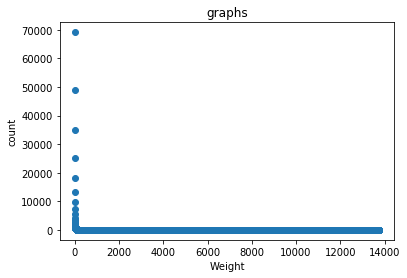

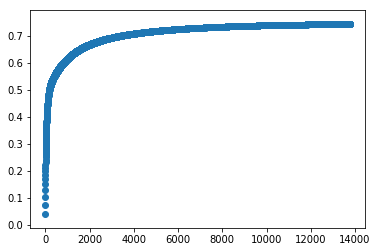

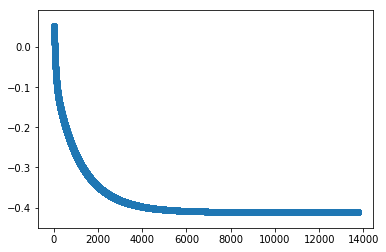

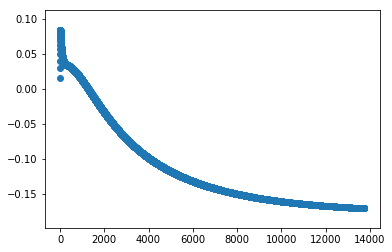

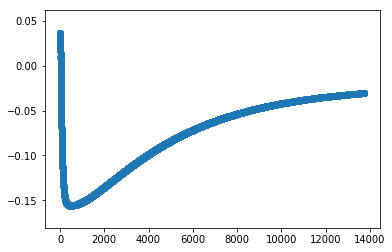

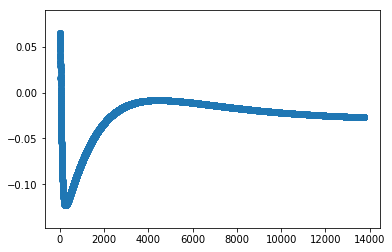

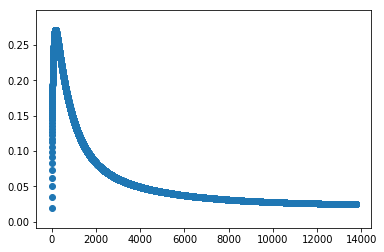

In [199]:
# graph representatoin
plt.scatter(np.arange(count),delta1)
plt.title('graphs')
plt.xlabel('Weight')
plt.ylabel('count')
plt.show()
plt.scatter(np.arange(count),Weight0)
plt.show()
plt.scatter(np.arange(count),Weight1)
plt.show()
plt.scatter(np.arange(count),Weight2)
plt.show()
plt.scatter(np.arange(count),Weight3)
plt.show()
plt.scatter(np.arange(count),Weight4)
plt.show()
plt.scatter(np.arange(count),Weight5)
plt.show()

### conclusion- As our code shows we have got that close form(solution) and gradient descent both are save ,Now as per guideline we have to find what is time  taken by close for and gradient descent  and the solution match of gradient descent and close form algo

#### Time for close form-468862056732177 ,time for gradient descent-3033485412597656 ,which algo take less time :-(468862056732177)-(3033485412597656)      time=16552321345332

#### Fact= gradient descent algoritham  takes less time than close form 